In [1]:
cd ~/Dropbox/CTX_to_jpg/pipeline_check/

/Users/klay6683/Dropbox/CTX_to_jpg/pipeline_check


In [23]:
from planet4 import clustering, io, markings, helper_functions as hf, plotting
from pathlib import Path

In [ ]:
path = Path("/Users/klay6683/data/planet4/ice_free_check")
path.mkdir(exist_ok=True)
cm = clustering.ClusteringManager(fnotched_dir=path,
                                 include_angle=True, include_distance=False, 
                                 include_radius=False, eps=10, min_distance=20)

In [ ]:
cm.cluster_image_name('ESP_022699_0985')

In [ ]:
from planet4 import plotting

In [ ]:
db = io.DBManager()

In [ ]:
data = db.get_image_name_markings('ESP_022699_0985')

In [ ]:
blotches = data[data.marking=='blotch']

In [ ]:
def is_rad1_larger(x):
    return x['radius_1']>x['radius_2']

In [ ]:
data.loc[data.marking=='blotch', 'rad1larger'] = blotches.apply(is_rad1_larger, axis=1)

In [ ]:
data.rad1larger.value_counts()

In [ ]:
data[data.marking=='blotch'].info()

In [ ]:
from ipyparallel import Client
c = Client()

In [21]:
# At the beginning of the notebook
import logging
logger = logging.getLogger()
assert len(logger.handlers) == 1
logger.addHandler(logging.StreamHandler())
handler = logger.handlers[1]
handler.setLevel(logging.DEBUG)

In [18]:
def process_imgid(id_, dynamic=False, angle=False, distance=False, radius=False):
    import matplotlib.pyplot as plt
    from planet4 import plotting, clustering
    from pathlib import Path
    path = Path("/Users/klay6683/data/planet4/pipelinecheck5")
    cm = clustering.ClusteringManager(fnotched_dir=path,
                                      do_dynamic_min_samples=dynamic,
                                      include_angle=angle,
                                      include_distance=distance,
                                      include_radius=radius)
    cm.cluster_image_id(id_)
    plotting.plot_image_id_pipeline(id_, datapath=path, save=True)
#     plt.close('all')
    return id_

In [19]:
%matplotlib inline

Clustering data for APF00001dr
ClusterManager: cluster_data()
Running DBSCAN
Estimated number of clusters: 6
Reduced data to 6 fan(e)s.
Running DBSCAN
Estimated number of clusters: 3
Reduced data to 3 blotch(e)s.
CM: do_the_fnotch
CM: do_the_fnotch: Found 1 fnotches.
Clustering and fnotching completed.
CM: Writing output files.
CM: Output dir: /Users/klay6683/data/planet4/pipelinecheck5
Executing apply_fnotch_cut
Executing get_newfans_newblotches
No of fans now: 6
Apply fnotch cut: no blotches survived.
Finished apply_fnotch_cut.


n_classifications: 82
min_samples: 3


Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.


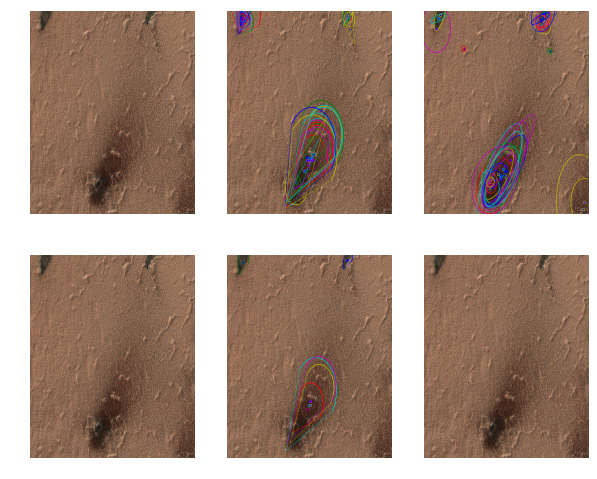

Found image in cache.
Found image in cache.
Found image in cache.


'1dr'

In [22]:
process_imgid('1dr')

Found image in cache.


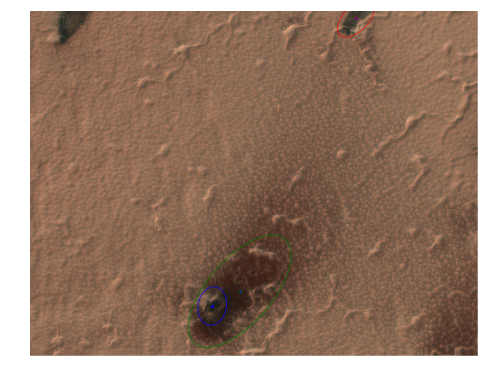

In [24]:
plotting.plot_clustered_blotches('1dr')

Found image in cache.
Found image in cache.


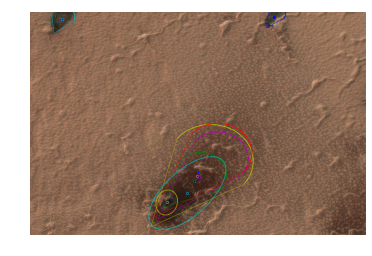

In [25]:
plotting.plot_finals('1dr')

In [29]:
from planet4.plotting import plot_clustered_blotches, plot_clustered_fans, plot_finals

Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.


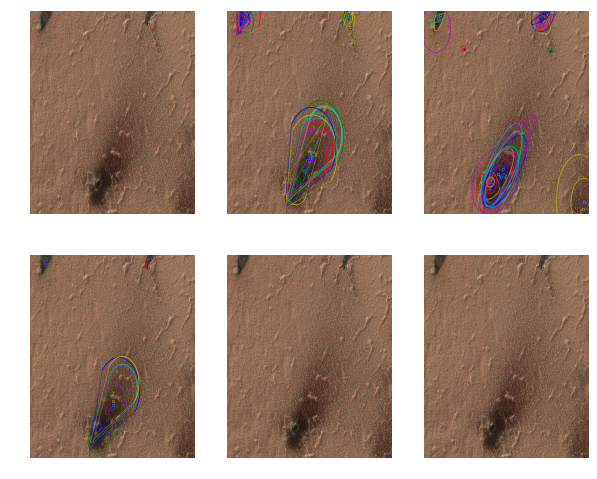

Found image in cache.


In [35]:
image_id = '1dr'
imgid = markings.ImageID(image_id)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.ravel()
for ax in axes:
    imgid.show_subframe(ax=ax)
imgid.plot_fans(ax=axes[1])
imgid.plot_blotches(ax=axes[2])
plot_finals(image_id, ax=axes[3])
# plot_clustered_fans(image_id, ax=axes[4])
plot_clustered_blotches(image_id, ax=axes[5])


Entering markings.plot_blotches
Plotting background image.
Found image in cache.


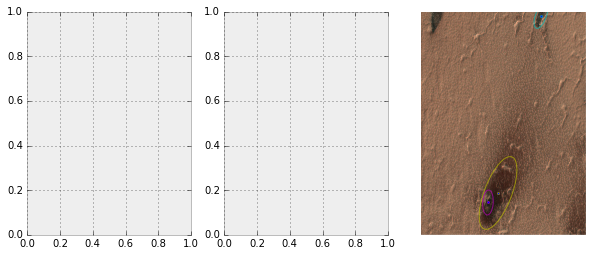

In [51]:
image_id = '1dr'
imgid = markings.ImageID(image_id)
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
axes = axes.ravel()
# for ax in axes:
#     imgid.show_subframe(ax=ax)
# plot_clustered_fans(image_id, ax=axes[1])
plot_clustered_blotches(image_id, ax=axes[2])


Found image in cache.


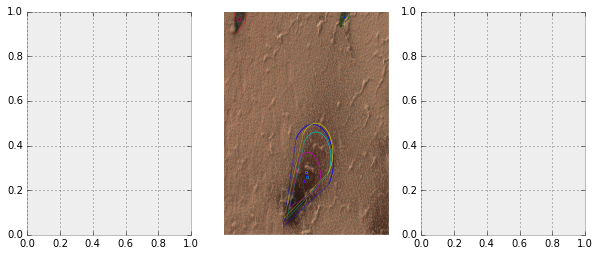

Entering markings.plot_blotches
Plotting background image.
Found image in cache.


In [50]:
image_id = '1dr'
imgid = markings.ImageID(image_id)
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
axes = axes.ravel()
# for ax in axes:
#     imgid.show_subframe(ax=ax)
plot_clustered_fans(image_id, ax=axes[1])
plot_clustered_blotches(image_id, ax=axes[2])


In [12]:
process_imgid('1dr', dynamic=True, angle=True, distance=True)

Clustering data for APF00001dr
ClusterManager: cluster_data()
Running DBSCAN
Estimated number of clusters: 1
Reduced data to 1 fan(e)s.
Running DBSCAN
Estimated number of clusters: 0
Reduced data to 0 blotch(e)s.
Clustering and fnotching completed.
CM: Writing output files.
CM: Output dir: /Users/klay6683/data/planet4/pipelinecheck5
Executing apply_fnotch_cut
Executing get_newfans_newblotches
Apply fnotch cut: No new blotches found.
Finished apply_fnotch_cut.


n_classifications: 82
min_samples: 8


'1dr'

In [ ]:
p1 = (221.79, 508.936)
p2 = (232, 517)

In [ ]:
from scipy.linalg import norm

In [ ]:
dp = np.array(p1) - np.array(p2)

In [ ]:
dp

In [ ]:
norm(dp)

In [ ]:
recheck_ids = ['1dn','1k3','1e4','1fe','1aa','225','1pr','19g']
for imid in recheck_ids:
    print(imid)
    cm.cluster_image_id(imid)
    plotting.plot_image_id_pipeline(imid, datapath=path, save=True)

In [ ]:
db = io.DBManager()
data = db.get_image_id_markings('1fe')

In [ ]:
data.classification_id.nunique()

In [ ]:
plotting.plot_finals(imid, _dir=path)

In [ ]:
plotting.plot_raw_blotches(imid)

In [ ]:
from planet4.plotting import blotches_all, fans_all

In [ ]:
import seaborn as sns
sns.set_context('notebook')
blotches_all(imid)

In [ ]:
fans_all(imid)

In [ ]:
lbview = c.load_balanced_view()

In [ ]:
import nbtools.multiprocessing as mptools

In [ ]:
results = lbview.map_async(process_imgid, ids)

In [ ]:
mptools.nb_progress_display(results, ids)